In [1]:
import matplotlib.pyplot as plt
import os
import glob 
import pathlib
import time
import tensorflow as tf

from scipy.io import loadmat
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
# define the standalone generator model
def VGG(image_shape, include_top=False):

	"""
	Construct a VGG face descriptor model
	"""
 
	# Image Input
	inputs = tf.keras.Input(shape=image_shape, name="Input_Image")
 
	## Convolutional layers
	# Layers 1-2
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd1_1")(inputs)
	x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", name="conv1_1")(x)

	# Layers 3-4
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd1_2")(x)
	x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu", name="conv1_2")(x)

	# Layers 5
	x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="pool1")(x)

	# Layers 6-7
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd2_1")(x)
	x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, activation="relu", name="conv2_1")(x)

	# Layers 8-9
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd2_2")(x)
	x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, activation="relu", name="conv2_2")(x)

	# Layers 10
	x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="pool2")(x)

	# Layers 11-12
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd3_1")(x)
	x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu", name="conv3_1")(x)

	# Layers 13-14
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd3_2")(x)
	x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu", name="conv3_2")(x)

	# Layers 15-16
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd3_3")(x)
	x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, activation="relu", name="conv3_3")(x)

	# Layers 17
	x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="pool3")(x)

	# Layers 18-19
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd4_1")(x)
	x = tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, activation="relu", name="conv4_1")(x)

	# Layers 20-21
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd4_2")(x)
	x = tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, activation="relu", name="conv4_2")(x)
	
	# Layers 22-23
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd4_3")(x)
	x = tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, activation="relu", name="conv4_3")(x)

	# Layers 24
	x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="pool4")(x)

	# Layers 25-26
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd5_1")(x)
	x = tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, activation="relu", name="conv5_1")(x)

	# Layers 27-28
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd5_2")(x)
	x = tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, activation="relu", name="conv5_2")(x)

	# Layers 29-30
	x = tf.keras.layers.ZeroPadding2D(padding=1, name="padd5_3")(x)
	x = tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, activation="relu", name="conv5_3")(x)

	# Layers 31
	x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="pool5")(x)

	if include_top:
		# Layers 32-33
		x = tf.keras.layers.Conv2D(filters=4096, kernel_size=7, strides=1, activation="relu", name="fc6")(x)
		x = tf.keras.layers.Dropout(rate=0.5, name="dropout6")(x)

		# Layers 34-35
		x = tf.keras.layers.Conv2D(filters=4096, kernel_size=1, strides=1, activation="relu", name="fc7")(x)
		x = tf.keras.layers.Dropout(rate=0.5, name="dropout7")(x)

		# Layers 36
		x = tf.keras.layers.Conv2D(filters=2622, kernel_size=1, strides=1, activation="relu", name="fc8")(x)

		# Output Layer
		x = tf.keras.layers.Flatten(name="flatten")(x)
		x = tf.keras.layers.Activation(activation="softmax", name="prob")(x)
 
	# Define model
	model = tf.keras.Model(inputs=inputs, outputs=x, name="VGG")
 
	return model

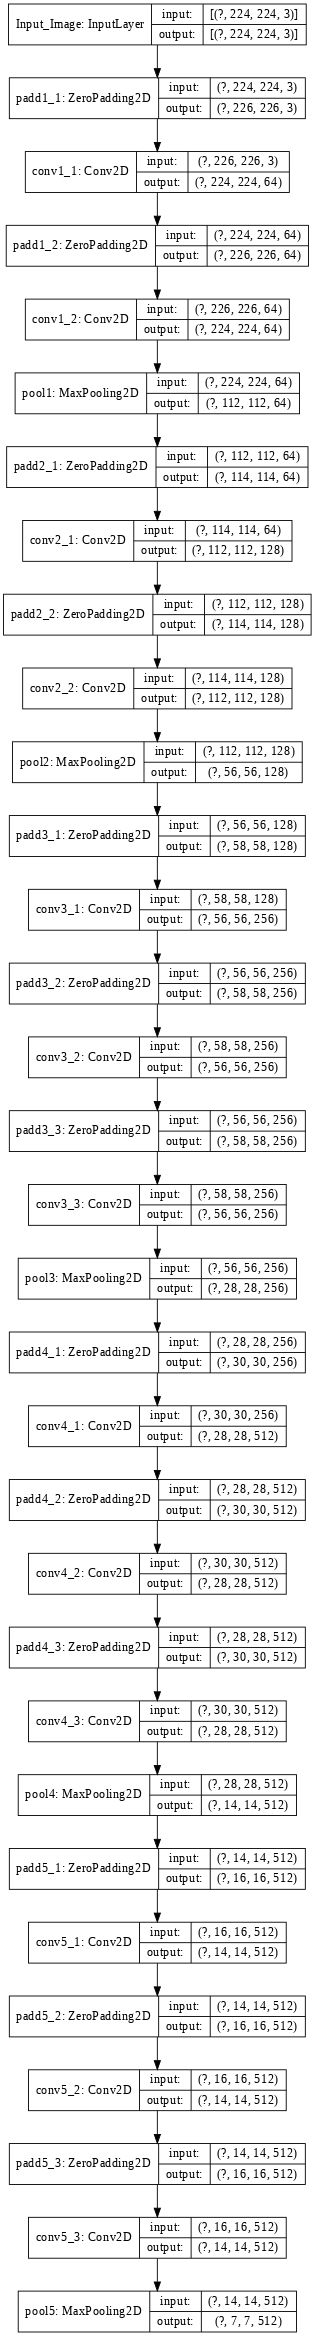

In [3]:
# create the model
base_model = VGG(image_shape=(224, 224, 3))

# plot the model
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, dpi=64)

In [4]:
# URL = "https://m-training.s3-us-west-2.amazonaws.com/dlchallenge/vgg_face_matconvnet.tar.gz"
# path_to_zip = tf.keras.utils.get_file('vgg_face_matconvnet.tar', origin=URL, extract=True)
# PATH = os.path.join(os.path.dirname(path_to_zip), 'vgg_face_matconvnet/data')
# data = loadmat(PATH+'/vgg_face.mat', matlab_compatible=False, struct_as_record=False)
# data

In [5]:
data = loadmat('vgg_face.mat', matlab_compatible=False, struct_as_record=False)
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Oct 13 16:54:01 2015',
 '__version__': '1.0',
 'net': array([[<scipy.io.matlab.mio5_params.mat_struct object at 0x7f46c0158ac8>]],
       dtype=object)}

In [6]:
# the net object stores mat_struct object.
net = data['net'][0][0]

# Net object contains classes, layers and normalization sub objects. 
# Classes and normalization are discarded because weights are stored in layers.
ref_model_layers = net.layers[0]
print("Shape of reference model layer: ", ref_model_layers.shape)

for layer in ref_model_layers:
    print(layer[0][0].name)

Shape of reference model layer:  (39,)
['conv1_1']
['relu1_1']
['conv1_2']
['relu1_2']
['pool1']
['conv2_1']
['relu2_1']
['conv2_2']
['relu2_2']
['pool2']
['conv3_1']
['relu3_1']
['conv3_2']
['relu3_2']
['conv3_3']
['relu3_3']
['pool3']
['conv4_1']
['relu4_1']
['conv4_2']
['relu4_2']
['conv4_3']
['relu4_3']
['pool4']
['conv5_1']
['relu5_1']
['conv5_2']
['relu5_2']
['conv5_3']
['relu5_3']
['pool5']
['fc6']
['relu6']
['dropout6']
['fc7']
['relu7']
['dropout7']
['fc8']
['softmax']


## Setting weights

Just convolution and fully connected layers have weights. Trying to access weights for the rest of layers such as pooling or relu will cause exception. 

In [7]:
for layer in base_model.layers:
  layer_name = layer.name
  try:
    print(layer_name,": ", layer.weights[0].shape)
  except:
    print("",end='')

conv1_1 :  (3, 3, 3, 64)
conv1_2 :  (3, 3, 64, 64)
conv2_1 :  (3, 3, 64, 128)
conv2_2 :  (3, 3, 128, 128)
conv3_1 :  (3, 3, 128, 256)
conv3_2 :  (3, 3, 256, 256)
conv3_3 :  (3, 3, 256, 256)
conv4_1 :  (3, 3, 256, 512)
conv4_2 :  (3, 3, 512, 512)
conv4_3 :  (3, 3, 512, 512)
conv5_1 :  (3, 3, 512, 512)
conv5_2 :  (3, 3, 512, 512)
conv5_3 :  (3, 3, 512, 512)


In [8]:
for i in range(ref_model_layers.shape[0]):
  ref_model_layer = ref_model_layers[i][0,0].name[0]
  try:
    weights = ref_model_layers[i][0,0].weights[0,0]
    print(ref_model_layer,": ",weights.shape)
  except:
    print("",end='')

conv1_1 :  (3, 3, 3, 64)
conv1_2 :  (3, 3, 64, 64)
conv2_1 :  (3, 3, 64, 128)
conv2_2 :  (3, 3, 128, 128)
conv3_1 :  (3, 3, 128, 256)
conv3_2 :  (3, 3, 256, 256)
conv3_3 :  (3, 3, 256, 256)
conv4_1 :  (3, 3, 256, 512)
conv4_2 :  (3, 3, 512, 512)
conv4_3 :  (3, 3, 512, 512)
conv5_1 :  (3, 3, 512, 512)
conv5_2 :  (3, 3, 512, 512)
conv5_3 :  (3, 3, 512, 512)
fc6 :  (7, 7, 512, 4096)
fc7 :  (1, 1, 4096, 4096)
fc8 :  (1, 1, 4096, 2622)


In [9]:
base_model_layer_names = [layer.name for layer in base_model.layers]
num_of_ref_model_layers = ref_model_layers.shape[0]
for i in range(num_of_ref_model_layers):
  ref_model_layer = ref_model_layers[i][0][0].name[0]
  # print(ref_model_layer)
  if ref_model_layer in base_model_layer_names:
    if ref_model_layer.find("conv") == 0 or ref_model_layer.find("fc") == 0:
      print(i, ". ", ref_model_layer)
      
      base_model_index = base_model_layer_names.index(ref_model_layer)
      weights = ref_model_layers[i][0][0].weights[0,0]
      bias = ref_model_layers[i][0][0].weights[0,1]

      base_model.layers[base_model_index].set_weights([weights, bias[:,0]])

0 .  conv1_1
2 .  conv1_2
5 .  conv2_1
7 .  conv2_2
10 .  conv3_1
12 .  conv3_2
14 .  conv3_3
17 .  conv4_1
19 .  conv4_2
21 .  conv4_3
24 .  conv5_1
26 .  conv5_2
28 .  conv5_3


 Now base model has weights in Keras format

# Data Preprocessing


## Data Download

In [10]:
_URL = "https://s3.amazonaws.com/matroid-web/datasets/agegender_cleaned.tar.gz"
path_to_zip = tf.keras.utils.get_file('agegender_cleaned.tar', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'combined')
data_dir = pathlib.Path(PATH)

In [11]:
BATCH_SIZE = 24
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [12]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*/*.jpg'), shuffle=True)
for f in list_ds.take(5):
  print(f.numpy())

b'/root/.keras/datasets/combined/aligned/07_M/landmark_aligned_face.1523.12039502314_41312b3213_o.jpg'
b'/root/.keras/datasets/combined/aligned/05_F/landmark_aligned_face.1388.11079722836_8262142050_o.jpg'
b'/root/.keras/datasets/combined/aligned/22_M/nm3150488_rm1639762688_1992-0-0_2014.jpg'
b'/root/.keras/datasets/combined/aligned/13_M/28735868_1932-09-21_1946.jpg'
b'/root/.keras/datasets/combined/aligned/27_M/42013346_1986-03-07_2013.jpg'


In [13]:
class_names = np.array(sorted([item.name for item in pathlib.Path(os.path.join(data_dir, "aligned")).glob("*M")]))

# normalizing the images to [-1, 1]
def normalize(img):
  img = tf.cast(img, tf.float32)
  img = (img / 127.5) - 1
  return img

# Reads an image from a file, decodes it into a dense tensor, and resizes it to a fixed shape.
def parse_image(file_path):

  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  one_hot = tf.dtypes.cast(one_hot, tf.uint8)
  label = tf.reduce_max(one_hot)

  # load the raw data from the file as a string
  image = tf.io.read_file(file_path)
  # convert the compressed string to a 3D uint8 tensor
  image = tf.image.decode_jpeg(image)
  image = normalize(image)
  image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])

  return image, label

### Map it over the dataset

In [14]:
image_count = len(list_ds)
print(image_count)

33118


In [15]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [16]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

26495
6623


In [17]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(parse_image, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(parse_image, num_parallel_calls=AUTOTUNE)

In [18]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  1


### Configure dataset for performance

In [19]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

### Visualize the data

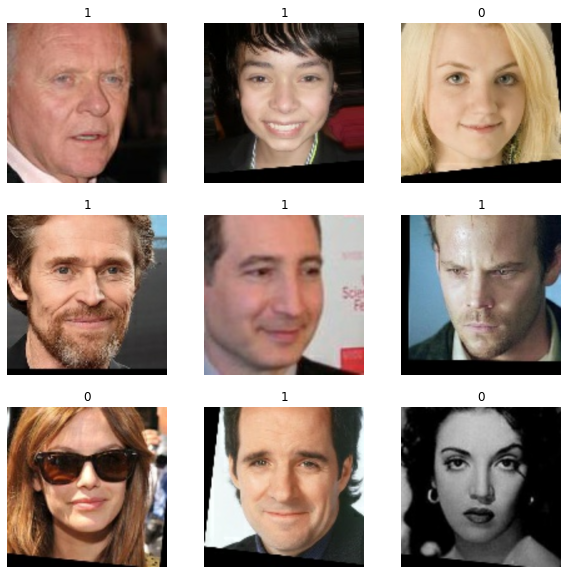

In [20]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy()*0.5 + 0.5)
  label = label_batch[i]
  plt.title(label.numpy())
  plt.axis("off")

## Feature Extraction

## Freeze the convolutional base

In [21]:
base_model.trainable = False

In [22]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="Average_pooling")(x)
x = tf.keras.layers.Dropout(rate=0.2, name="dropout")(x)
outputs = tf.keras.layers.Dense(1, name="output")(x)
model = tf.keras.Model(inputs, outputs, name="Gender_Classifier")

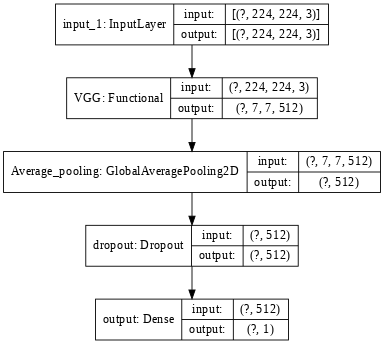

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [24]:
model.summary()

Model: "Gender_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
VGG (Functional)             (None, 7, 7, 512)         14714688  
_________________________________________________________________
Average_pooling (GlobalAvera (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


# Compile the model

In [25]:
# base_learning_rate = 1e-4
# model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[tf.keras.metrics.BinaryAccuracy()])

## Train the Model

In [26]:
@tf.function
def train_step(image, label):
  # Open a GradientTape.
  with tf.GradientTape() as tape:
    # Forward pass.
    logits = model(image, training=True)
    # Compute the loss value for this batch.
    loss_value = loss_fn(label, logits)
    
  # Get gradients of loss wrt the *trainable* weights.
  grads = tape.gradient(loss_value, model.trainable_weights)
  # Update the weights of the model.
  optimizer.apply_gradients(zip(grads, model.trainable_weights))
  # Update training metric.
  train_metrics.update_state(label, logits)

  return loss_value

@tf.function
def test_step(image, label):
    val_logits = model(image)
    val_metrics.update_state(label, val_logits)

In [ ]:
EPOCHS = 10
base_learning_rate = 1e-4
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(lr=base_learning_rate)
train_metrics = tf.keras.metrics.BinaryAccuracy()
val_metrics = tf.keras.metrics.BinaryAccuracy()

for epoch in range(EPOCHS):
  print("\nStart of epoch %d" % (epoch,))
  start_time = time.time()

  # Iterate over the batches of a dataset.
  for step, (inputs, targets) in enumerate(train_ds):
    loss_value = train_step(inputs, targets)

    # Log every 200 batches.
    if step % 200 == 0:
      print("Training loss (for one batch) at step %d: %.4f" % (step, float(loss_value)))
      print("Seen so far: %d samples" % ((step + 1) * 64))
  
  # Display metrics at the end of each epoch.
  train_acc = train_metrics.result()
  print("Training acc over epoch: %.4f" % (float(train_acc),))

  # Reset training metrics at the end of each epoch
  train_metrics.reset_states()

  # Run a validation loop at the end of each epoch.
  for image_val, label_val in val_ds:
    test_step(image_val, label_val)
      
  val_acc = val_metrics.result()
  val_metrics.reset_states()
  print("Validation acc: %.4f" % (float(val_acc),))
  print("Time taken: %.2fs" % (time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 0.6925
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.6796
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.6759
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.6802
Seen so far: 38464 samples


In [ ]:
# EPOCHS = 10
# loss0, accuracy0 = model.evaluate(val_ds)
# print("initial loss: {:.2f}".format(loss0))
# print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
# history = model.fit(train_ds,
#                     epochs=EPOCHS,
#                     validation_data=val_ds)

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.title('Training and Validation Accuracy')

# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
# plt.title('Training and Validation Loss')
# plt.xlabel('epoch')
# plt.show()